<a href="https://colab.research.google.com/github/HussainPythonista/cat-vs-dog-cnn/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello world")

Hello world


#### GET Data

> Before doing any operation we should get data from somewhere, Here I'm Going to get the datas from Kaggle,so before, because of that we need to do some operation fo get data from Kaggle

In [2]:
#Install the library
!pip install opendatasets --upgrade --quiet

In [3]:
#Importing the libraries 
import opendatasets as od
dataset_url = 'https://www.kaggle.com/competitions/dogs-vs-cats/data'
od.download(dataset_url)

Skipping, found downloaded files in "./dogs-vs-cats" (use force=True to force download)


In [ ]:
!unzip /content/dogs-vs-cats/test1.zip
!unzip /content/dogs-vs-cats/train.zip 

#### Loading And Understanding data

- Here I'm going to import important libraries
- Loading data's
- Data Preparation
-Visualize the data

In [5]:
#Import important libraries
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sb

#Someother Libraries
import os
import shutil
import random
import glob
import itertools

import warnings 
warnings.simplefilter(action="ignore",category=FutureWarning)

In [6]:
#importing libraries for tensorflow

#For Confusion Matrix
from sklearn.metrics import confusion_matrix

#For Deeplearning Tasks
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#For creating models
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D


In [7]:
#Checking GPU
physical_devices=tf.config.experimental.list_physical_devices("GPU")
print("Number of GPU",len(physical_devices))

Number of GPU 1


Loading Data

- Here we are going to load our data for image processing

Before fit the image in algorithm

- We dont need that much data for learning purpose,
  so i'm going to fit the algorithm with sample data,   that will be good,i guess

- Steps
  
  * Make directories 
  * Randomly sample the data and fill it in the created Folder

In [8]:
os.chdir("/content/train")
if os.path.isdir("trainData/dog") is False:
  os.makedirs("trainData/dog")
  os.makedirs("trainData/cat")
  os.makedirs("valData/dog")
  os.makedirs("valData/cat")
  os.makedirs("testData/dog")
  os.makedirs("testData/cat")

  for c in random.sample(glob.glob("cat*"),500):
    shutil.move(c,"trainData/cat")
  for c in random.sample(glob.glob("dog*"),500):
    shutil.move(c,"trainData/dog")
  for c in random.sample(glob.glob("cat*"),100):
    shutil.move(c,"valData/cat")
  for c in random.sample(glob.glob("dog*"),100):
    shutil.move(c,"valData/dog")
  for c in random.sample(glob.glob("cat*"),50):
    shutil.move(c,"testData/cat")
  for c in random.sample(glob.glob("dog*"),50):
    shutil.move(c,"testData/dog")

In [9]:
train_path="/content/train/trainData"
test_path="/content/train/testData"
val_path="/content/train/valData"

In [10]:
#from tensorflow.python.ops.control_flow_ops import from_control_flow_context_def
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,target_size=(224,224),classes=["cat","dog"],batch_size=10)
val_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path,target_size=(224,224),classes=["cat","dog"],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,target_size=(224,224),classes=["cat","dog"],batch_size=10,shuffle=False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
#Here we are just veryfying that
assert train_batches.n==1000
assert val_batches.n==200
assert test_batches.n==100



I'm going to grab single batch of images and visualize it

In [12]:
image,labels=next(train_batches)

In [13]:
#Plotin the image and pritn the labels of that
def plotImages(image_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

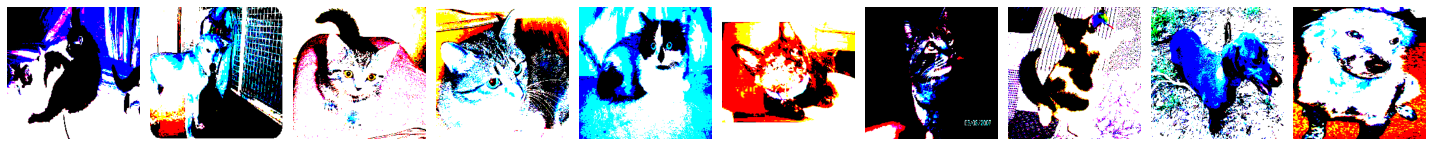

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [14]:
plotImages(image)
print(labels)

**Insights**

- we print both image and labels of that particular dataset

#### Build and train model

- Here,I'm going to fit my data into the model,

Create the Sequential Model

In [15]:
model=Sequential([
                Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3),padding="same"),
                MaxPool2D(pool_size=(2,2),strides=2),
                Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
                MaxPool2D(pool_size=(2,2),strides=2),
                Flatten(),
                Dense(units=2,activation="softmax")

])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [17]:
#Compile our model
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [18]:
#Fitting our model
model.fit(x=train_batches,validation_data=val_batches,epochs=10,verbose=2)

Epoch 1/10
100/100 - 12s - loss: 27.2553 - accuracy: 0.5580 - val_loss: 8.9861 - val_accuracy: 0.5900 - 12s/epoch - 122ms/step
Epoch 2/10
100/100 - 10s - loss: 3.9306 - accuracy: 0.7060 - val_loss: 3.0923 - val_accuracy: 0.6650 - 10s/epoch - 102ms/step
Epoch 3/10
100/100 - 6s - loss: 1.0081 - accuracy: 0.8420 - val_loss: 2.5052 - val_accuracy: 0.7050 - 6s/epoch - 59ms/step
Epoch 4/10
100/100 - 6s - loss: 0.1766 - accuracy: 0.9520 - val_loss: 2.3990 - val_accuracy: 0.6900 - 6s/epoch - 58ms/step
Epoch 5/10
100/100 - 6s - loss: 0.1064 - accuracy: 0.9690 - val_loss: 2.3883 - val_accuracy: 0.6650 - 6s/epoch - 58ms/step
Epoch 6/10
100/100 - 6s - loss: 0.0509 - accuracy: 0.9830 - val_loss: 2.7786 - val_accuracy: 0.6800 - 6s/epoch - 58ms/step
Epoch 7/10
100/100 - 6s - loss: 0.0089 - accuracy: 0.9980 - val_loss: 2.2920 - val_accuracy: 0.6750 - 6s/epoch - 57ms/step
Epoch 8/10
100/100 - 6s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 2.2146 - val_accuracy: 0.6650 - 6s/epoch - 58ms/step
Epoch 9/1

- After fit our model we can clearly see that our model get overfit, so we need hadle that 

#### Test Model

- In this case we are going to check the created model with our our test dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

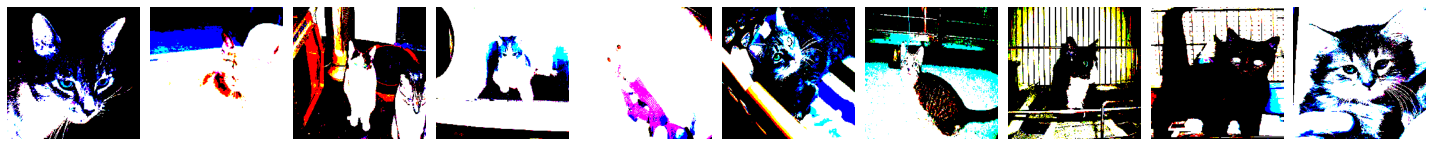

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [19]:
t_images,test_labels=next(test_batches)
plotImages(t_images)
print(test_labels)

In [20]:
classes=test_batches.classes
print(len(classes))
classes

100


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
prediction=model.predict(x=test_batches,verbose=0)

In [22]:
np.round(prediction)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [23]:
confusionMatrix=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(prediction,axis=-1))

In [24]:
def confusionPlot(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    #The function prints and plot the confusion matrix
    #Normalization can be applied by setting normalize=True
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    
    if normalize:
      cm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
      print("Normalized confusion Matrix")

    else:
      print("Confusion Matrix,without normaliztion")
    print(cm)

    thresh=cm.max()/2

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i,cm[i,j],horizontalalignment="center",color="red" if cm[i,j]> thresh else "black")

    plt.tight_layout()
    plt.ylabel("True")
    plt.xlabel("Predicted")

In [25]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix,without normaliztion
[[29 21]
 [16 34]]


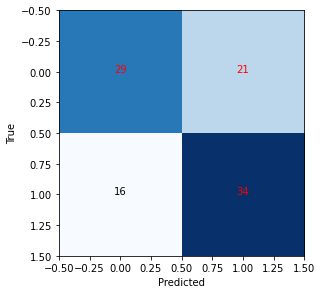

In [26]:
cm_plot_labels=["cat","dog"]
confusionPlot(cm=confusionMatrix,classes=cm_plot_labels,title="Confusion Matrix")

> We can clearly see that our model is overfitting,i'm going to fit my model on pre-trained model VGG,let see how it is going to work

#### VGG16 Net

- Initially VGGNet work on the image classification competition,We are going to import the VGGNet Api and Fine tune it as per our need ie Here classification of two images

**Pre processing**

- Before we fit our model,we want to do some preprocessing on data

  The only pre-processing we do is substracting MEAN of RGB Value,computed on the training set,from each pixel.

      Which means that, we computed mean value for all our training data For each colour we have (RED,BLUE,GREEN), afetr get our mean value we substract our mean value across each image in training set from each colour pixel like RED,BLUE,GREEN.

      Example: Mean of Red pixel in all tranining set is 250,
      Now Our first image one of red pixel is 200, 
      now the red pixel values for first image's first pixel's is 250-200=50

      like that for others as well

  If we pass new data to this particular model, we need to do same preprocessing step

**This is all about color processing** 

#### Build Fine-tuned VGG16 Model

- we need to import the model from tensorflow
- After importing this we can use like our previous model 

In [27]:
#Importing the model from tensorflow
vgg16_model=tf.keras.applications.vgg16.VGG16()

In [28]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The total Trainable parameters is nearly 13cr

This is **HUGE**

In [29]:
#def count_parameters(model):
 # non

In [30]:
type(vgg16_model)

keras.engine.functional.Functional

In [31]:
#Our new model is also a sequential model
#Create the sequential model
model=Sequential()


#Here, we keep evvery model until last layer as it is
#We add last layer only too classify either one of the category
new_vgg16_model=vgg16_model.layers[:-1]

#Create our new model with pretrained model
for layer in new_vgg16_model:
  model.add(layer)


In [32]:
#Checking the parameters
#params=count_

In [33]:
#Setting the pretrained model are not trainable
#We simply freeze those
for layer in model.layers:
  layer.trainable=False

#This wont retrain or backpropagation

In [34]:
#Here I'm going to add my own output layer
model.add(Dense(units=2,activation="softmax"))

In [35]:
#Checking the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

- While checking the model summary

we can clearly see that Traninable parameter is only 8k, not 13cr,because we set those are non-trainable

### Train and fine-tune model

In [39]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [42]:
model.fit(x=train_batches,validation_data=val_batches,epochs=5,verbose=2)

Epoch 1/5
100/100 - 21s - loss: 0.2738 - accuracy: 0.8940 - val_loss: 0.0996 - val_accuracy: 0.9750 - 21s/epoch - 208ms/step
Epoch 2/5
100/100 - 17s - loss: 0.0672 - accuracy: 0.9800 - val_loss: 0.0734 - val_accuracy: 0.9750 - 17s/epoch - 174ms/step
Epoch 3/5
100/100 - 18s - loss: 0.0439 - accuracy: 0.9890 - val_loss: 0.0699 - val_accuracy: 0.9750 - 18s/epoch - 175ms/step
Epoch 4/5
100/100 - 17s - loss: 0.0328 - accuracy: 0.9940 - val_loss: 0.0659 - val_accuracy: 0.9750 - 17s/epoch - 173ms/step
Epoch 5/5
100/100 - 17s - loss: 0.0248 - accuracy: 0.9950 - val_loss: 0.0646 - val_accuracy: 0.9800 - 17s/epoch - 174ms/step


In [44]:
assert model.history.history.get('accuracy')[-1]>0.95

#### Predict using fine tuned VGG16 model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

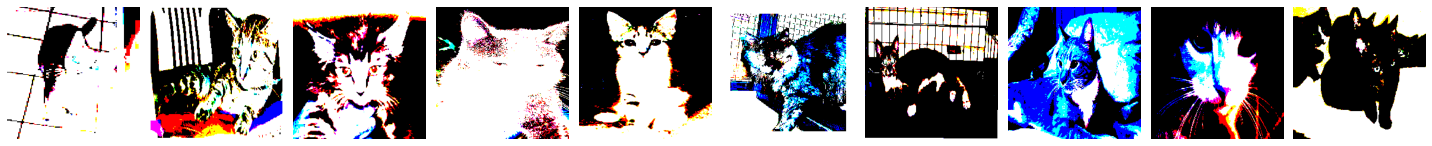

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [38]:
test_imgs,test_lbls=next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [45]:
#prediction
prediction=model.predict(x=test_batches,verbose=0)

In [47]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [48]:
#Create and see confusion matrix
confusionMatrix=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(prediction,axis=-1))

In [49]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Confusion Matrix,without normaliztion
[[50  0]
 [ 1 49]]


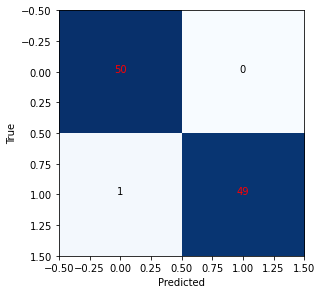

In [51]:
cm_plot_labels=["cat","dog"]
confusionPlot(cm=confusionMatrix,classes=cm_plot_labels,title="Confusion Matrix")

> We can clearly see that 

* Our own model doesn't fit correctly because that is overfitting
* But after fit our model in Pretrain model like VGG16 our model become more generic and more accurate

Because pretrain model which trained with huge data ie nearly million,that is the reaseon for this accuray